# Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Data Collection : import dataset

In [2]:
df=pd.read_csv("austo_automobile.csv")

In [3]:
df

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback


### Data profilling: size,shape,columns,data types

In [4]:
df.size

22134

In [5]:
df.shape

(1581, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [7]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

### Duplicate values


In [8]:
# Check duplicate
df.duplicated().sum()

np.int64(0)

In [9]:
# Check the null values
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

### Null handling -Missing values

In [10]:
# Check the description to understand the range of values available within the columns
df.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1475.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20225.559322,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,19573.149277,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38300.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


In [11]:
# Check the value counts of Gender column
df.Gender.value_counts()

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

In [12]:
### Check descripancies
df.Gender.unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [13]:
### Replace the wrong words with correct words  
df.Gender=df.Gender.replace(["Femal","Femle"],["Female","Female"])

In [14]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [15]:
# Check the value counts of Gender column
df.Gender.value_counts()

Gender
Male      1199
Female     329
Name: count, dtype: int64

In [16]:
#Most frequent value of Gender column is Male so we can fill all null values with Male
df.Gender=df.Gender.fillna('Male')

In [17]:
# Check the null values
df.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [18]:
# Fetch the required columns to check the link among them
new=df[df.Partner_salary.notnull()][["Salary","Partner_salary","Total_salary"]]

In [19]:
# To check the formula
(new.Total_salary==new.Partner_salary+new.Salary).unique()

array([ True])

In [20]:
# Fill the null values of Partner salary using the formula
df.Partner_salary=df.apply(lambda row:row.Total_salary-row.Salary if np.isnan(row.Partner_salary)else row.Partner_salary ,axis=1)

In [21]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [22]:
# Check all the categorical column's values
df.Profession.unique()

array(['Business', 'Salaried'], dtype=object)

In [23]:
df.Marital_status.unique()


array(['Married', 'Single'], dtype=object)

In [24]:
df.Education.unique()

array(['Post Graduate', 'Graduate'], dtype=object)

In [25]:
df.Personal_loan.unique()

array(['No', 'Yes'], dtype=object)

In [26]:
df.House_loan.unique()   

array(['No', 'Yes'], dtype=object)

In [27]:
df.Partner_working.unique()

array(['Yes', 'No'], dtype=object)

In [28]:
df.Make.unique()

array(['SUV', 'Sedan', 'Hatchback'], dtype=object)

(array([419., 312., 248.,  87., 107., 131., 108.,  71.,  29.,  69.]),
 array([22. , 25.2, 28.4, 31.6, 34.8, 38. , 41.2, 44.4, 47.6, 50.8, 54. ]),
 <BarContainer object of 10 artists>)

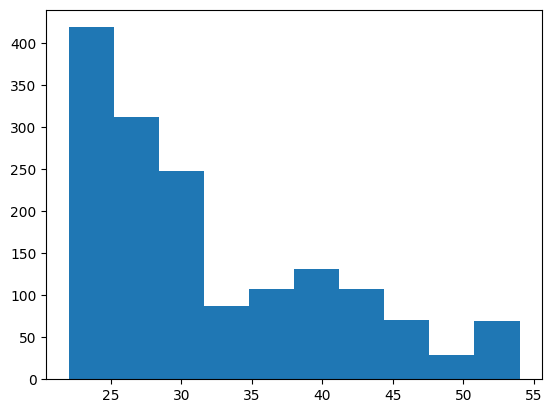

In [29]:
plt.hist(df.Age)

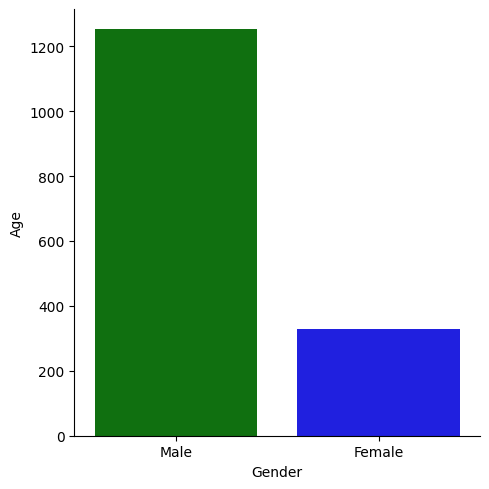

In [30]:
sns.catplot(df,x=df.Gender,y=df.Age,kind='bar',errorbar=None,estimator='count', palette=['green', 'blue'])

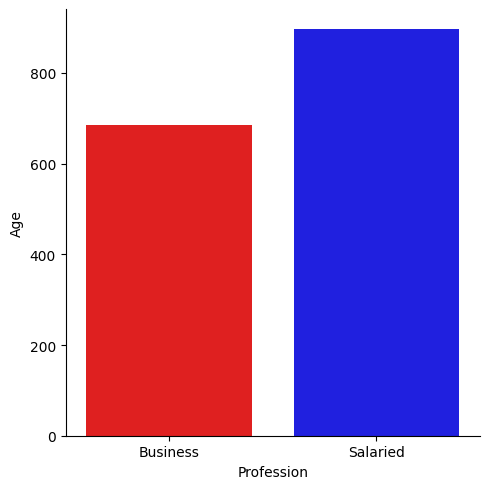

In [31]:
sns.catplot(df,x=df.Profession,y=df.Age,kind='bar',errorbar=None,estimator='count', palette=['red', 'blue'])

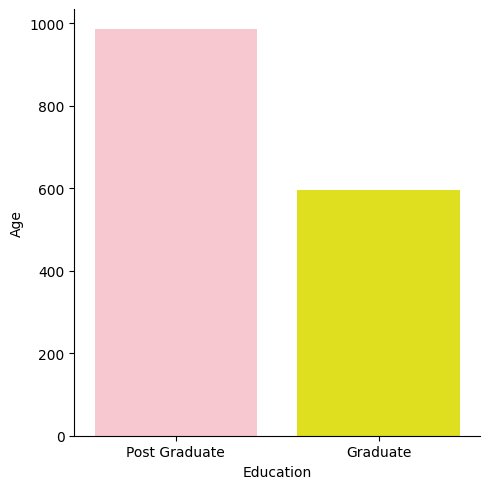

In [32]:
sns.catplot(df,x=df.Education,y=df.Age,kind='bar',errorbar=None,estimator='count', palette=['pink', 'yellow'])

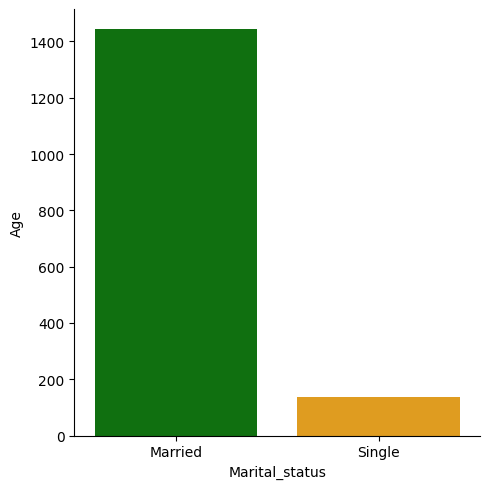

In [33]:
sns.catplot(df,x=df.Marital_status,y=df.Age,kind='bar',errorbar=None,estimator='count', palette=['green', 'orange'])

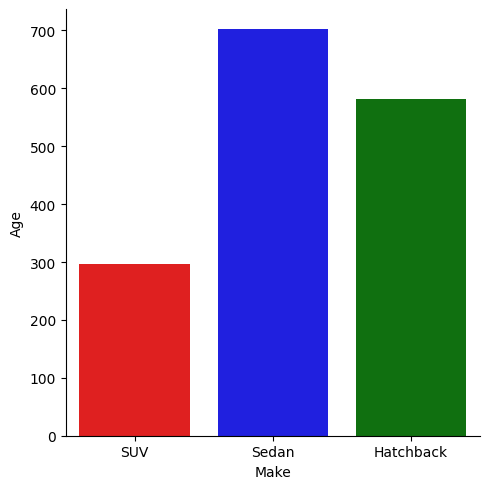

In [34]:
sns.catplot(df,x=df.Make,y=df.Age,kind='bar',errorbar=None,estimator='count', palette=['red', 'blue','green'])

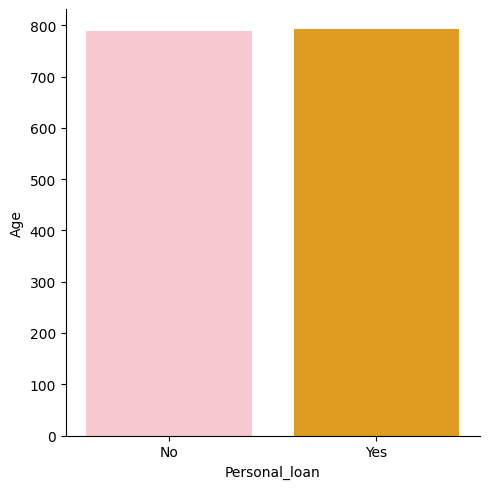

In [35]:
sns.catplot(df,x=df.Personal_loan,y=df.Age,kind='bar',errorbar=None,estimator='count', palette=['pink', 'orange'])

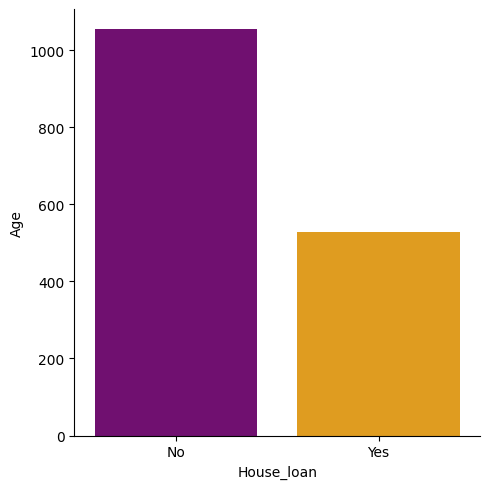

In [36]:
sns.catplot(df,x=df.House_loan,y=df.Age,kind='bar',errorbar=None,estimator='count', palette=['purple', 'orange'])

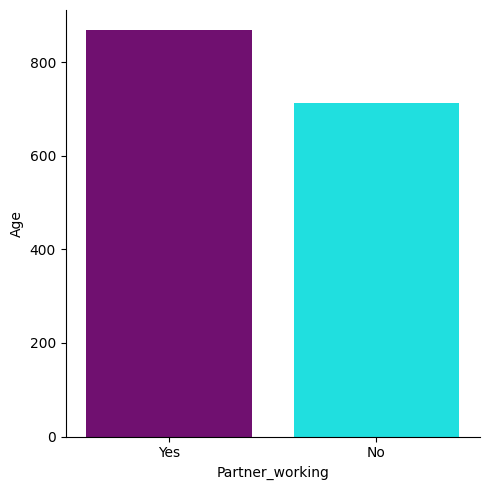

In [37]:
sns.catplot(df,x=df.Partner_working,y=df.Age,kind='bar',errorbar=None,estimator='count', palette=['purple', 'cyan'])

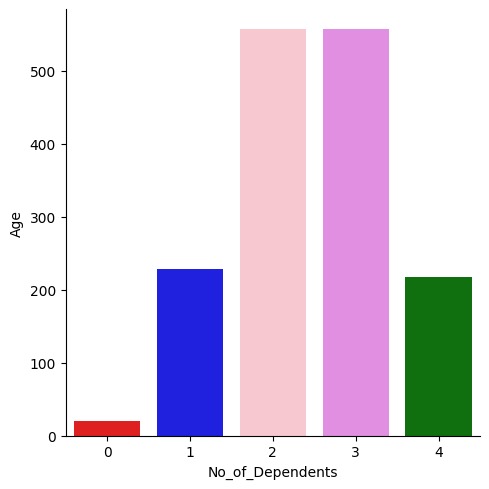

In [38]:
sns.catplot(df,x=df.No_of_Dependents,y=df.Age,kind='bar',errorbar=None,estimator='count', palette=['red', 'blue','pink','violet','green'])

<Axes: xlabel='Salary', ylabel='Count'>

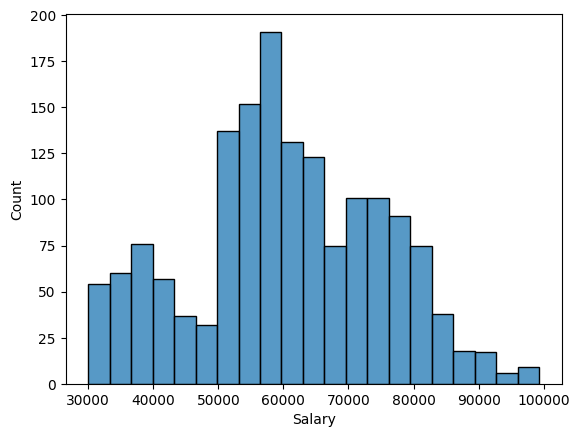

In [39]:
sns.histplot(df.Salary)

<Axes: xlabel='Total_salary', ylabel='Count'>

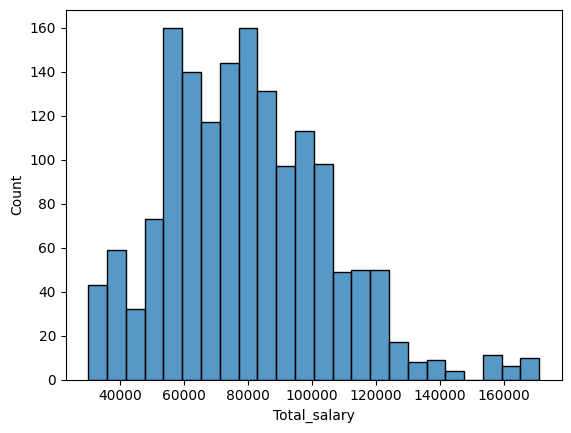

In [40]:
sns.histplot(df.Total_salary)

<Axes: xlabel='Partner_salary', ylabel='Count'>

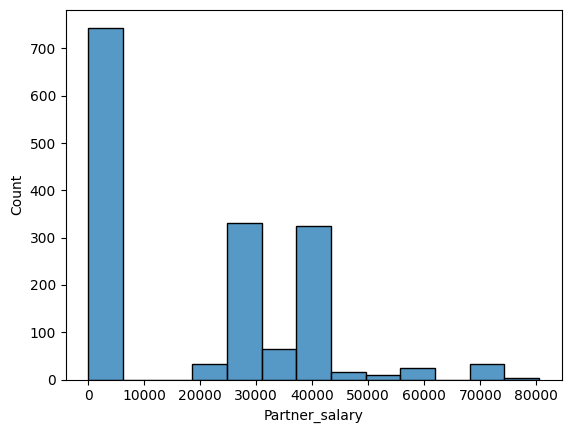

In [41]:
sns.histplot(df.Partner_salary)

### Data analysis and checking the insights-find the answers of given questions

In [42]:
# Check the Steve roger's statement
df.groupby('Make')['Make'].count()

Make
Hatchback    582
SUV          297
Sedan        702
Name: Make, dtype: int64

In [43]:
df.Make.value_counts()

Make
Sedan        702
Hatchback    582
SUV          297
Name: count, dtype: int64

In [44]:
df.groupby(['Make','Gender'])['Make'].count()

Make       Gender
Hatchback  Female     15
           Male      567
SUV        Female    173
           Male      124
Sedan      Female    141
           Male      561
Name: Make, dtype: int64

In [45]:
# Check the count of male & female
df.Gender.value_counts()

Gender
Male      1252
Female     329
Name: count, dtype: int64

In [46]:
Male=df.where(df["Gender"]=="Male").dropna()[["Gender","Make"]]

In [47]:
Female=df.where(df["Gender"]=="Female").dropna()[["Gender","Make"]]

In [48]:
Sam1=Male.sample(329).groupby("Make").count().rename(columns={"Gender":"Male"})

In [49]:
Sam2=Male.sample(329).groupby("Make").count().rename(columns={"Gender":"Male"})

In [50]:
Sam3=Male.sample(329).groupby("Make").count().rename(columns={"Gender":"Male"})

In [51]:
Sam1

,Male
Make,
Hatchback,162
SUV,30
Sedan,137


In [52]:
Sam2

,Male
Make,
Hatchback,152
SUV,41
Sedan,136


In [53]:
Sam3

,Male
Make,
Hatchback,155
SUV,32
Sedan,142


In [54]:
Fem=Female.groupby("Make").count().rename(columns={"Gender":"Female"})

In [55]:
MaleList=[Sam1.iloc[1][0],Sam2.iloc[1][0],Sam3.iloc[1][0]]

In [56]:
MaleList

[np.int64(30), np.int64(41), np.int64(32)]

In [57]:
FemaleList=[Fem.iloc[1][0],Fem.iloc[1][0],Fem.iloc[1][0]]

In [58]:
FemaleList

[np.int64(173), np.int64(173), np.int64(173)]

In [59]:
SUV=pd.DataFrame({"Male":MaleList,"Female":FemaleList},index=["Sam1","Sam2","Sam3"])

<Axes: >

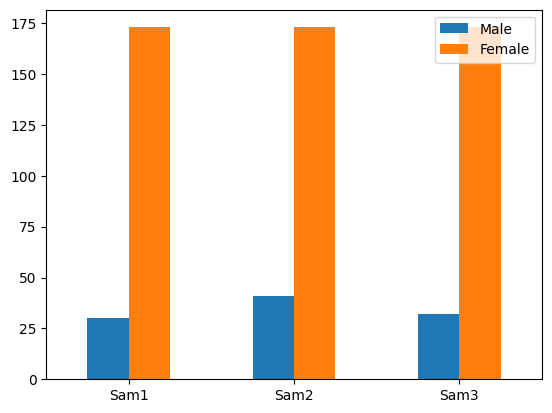

In [60]:
SUV.plot.bar(rot=0)

In [61]:
# Observation: I am not agree with Steve roger.According to the data I can say females are more interested in SUV over males

In [62]:
# According to the data I can say males are more likely to buy Hatchback over females

In [63]:
MHBList=[Sam1.iloc[0][0],Sam2.iloc[0][0],Sam3.iloc[0][0]]

In [64]:
FHBList=[Fem.iloc[0][0],Fem.iloc[0][0],Fem.iloc[0][0]]

In [65]:
HB=pd.DataFrame({"Male":MHBList,"Female":FHBList},index=["Sam1","Sam2","Sam3"])

<Axes: >

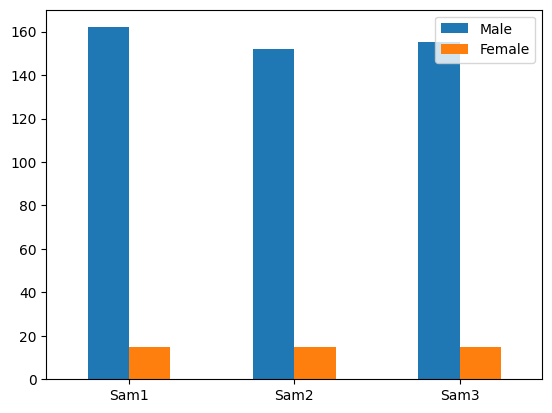

In [66]:
HB.plot.bar(rot=0)

In [67]:
# About SEDAN I can say there is no any big difference.
#males and females both are equally interested in SEDAN

In [68]:
SEDANMaleList=[Sam1.iloc[2][0],Sam2.iloc[2][0],Sam3.iloc[0][0]]

In [69]:
SEDANFemaleList=[Fem.iloc[2][0],Fem.iloc[2][0],Fem.iloc[2][0]]

In [70]:
SEDAN=pd.DataFrame({"Male":MaleList,"Female":FemaleList},index=["Sam1","Sam2","Sam3"])

<Axes: >

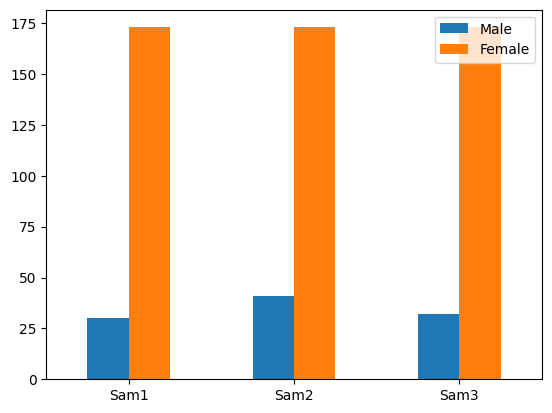

In [71]:
SEDAN.plot.bar(rot=0)

In [72]:
# Ned stark believes that salaried persons are more likely to buy SEDAN

In [73]:
Salaried=df.where(df["Profession"]=="Salaried").dropna()[["Profession","Make"]]

In [74]:
Business=df.where(df["Profession"]=="Business").dropna()[["Profession","Make"]]

In [75]:
df.Profession.value_counts()

Profession
Salaried    896
Business    685
Name: count, dtype: int64

In [76]:
Sal=Salaried.groupby('Make').count().rename(columns={'Profession':'Salaried'})

In [77]:
Bus=Business.groupby('Make').count().rename(columns={'Profession':'Business'})

In [78]:
Sal

,Salaried
Make,
Hatchback,292
SUV,208
Sedan,396


In [79]:
Bus

,Business
Make,
Hatchback,290
SUV,89
Sedan,306


In [80]:
SalList=[Sal.iloc[0][0],Sal.iloc[1][0],Sal.iloc[2][0]]
BusList=[Bus.iloc[0][0],Bus.iloc[1][0],Bus.iloc[2][0]]

In [81]:
Profession=pd.DataFrame({"Salaried":SalList,"Business":BusList},index=["Hatchback","SUV","Sedan"])

<Axes: >

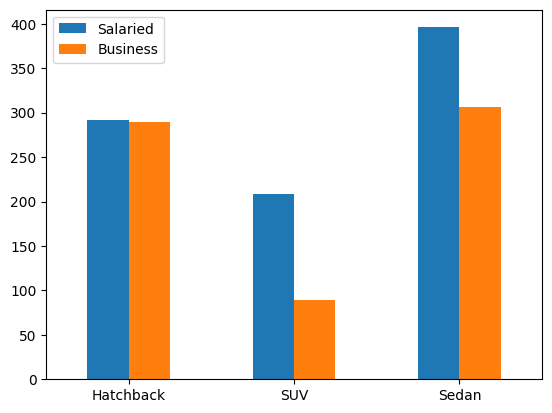

In [82]:
Profession.plot.bar(rot=0)

In [83]:
# it is observed that salaried persons are more interested in SUV and also in Sedan... Hatchback has equal interest

In [84]:
Sal_Male=df.where((df["Profession"]=="Salaried")&(df.Gender=="Male")).dropna()[["Profession","Make"]]

In [85]:
Sal_Female=df.where((df["Profession"]=="Salaried")&(df.Gender=="Female")).dropna()[["Profession","Make"]]

In [86]:
Sal_Male

,Profession,Make
4,Salaried,SUV
7,Salaried,SUV
8,Salaried,SUV
9,Salaried,SUV
10,Salaried,SUV
...,...,...
1569,Salaried,Hatchback
1574,Salaried,Sedan
1575,Salaried,Hatchback
1576,Salaried,Hatchback


In [87]:
Sal_Female

,Profession,Make
1,Salaried,SUV
2,Salaried,SUV
3,Salaried,SUV
5,Salaried,SUV
6,Salaried,SUV
...,...,...
1350,Salaried,Hatchback
1389,Salaried,Hatchback
1503,Salaried,Hatchback
1518,Salaried,Hatchback


<Axes: >

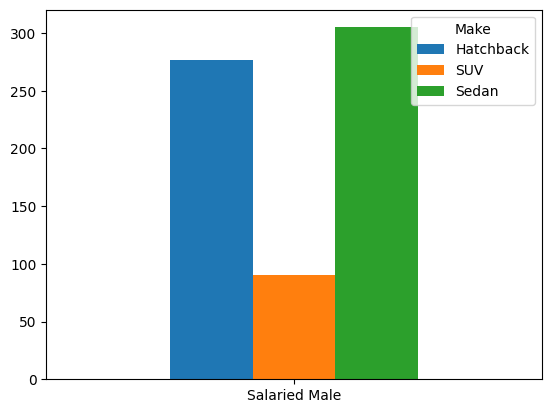

In [88]:
Sal_Male.groupby("Make").count().rename(columns={"Profession":"Salaried Male"}).T.plot.bar(rot=0)

In [89]:
Yes=df.where((df["Personal_loan"]=="Yes")).dropna()[["Personal_loan","Make"]].groupby("Make").count()

In [90]:
no=df.where((df["Personal_loan"]=="No")).dropna()[["Personal_loan","Make"]].groupby("Make").count()

In [91]:
Yes

,Personal_loan
Make,
Hatchback,291
SUV,116
Sedan,385


In [92]:
no

,Personal_loan
Make,
Hatchback,291
SUV,181
Sedan,317


In [93]:
YesList=[Yes.iloc[0][0],Yes.iloc[1][0],Yes.iloc[2][0]]
noList=[no.iloc[0][0],no.iloc[1][0],no.iloc[2][0]]

In [94]:
YesList

[np.int64(291), np.int64(116), np.int64(385)]

In [95]:
noList

[np.int64(291), np.int64(181), np.int64(317)]

In [96]:
Loan=pd.DataFrame({"Yes":YesList,"no":noList},index=["Hatchback","SUV","Sedan"])

<Axes: >

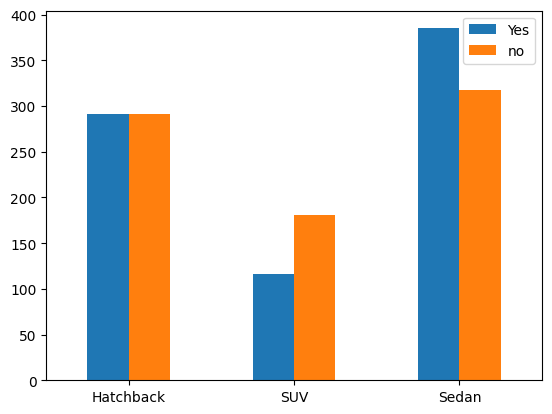

In [97]:
Loan.plot.bar(rot=0)

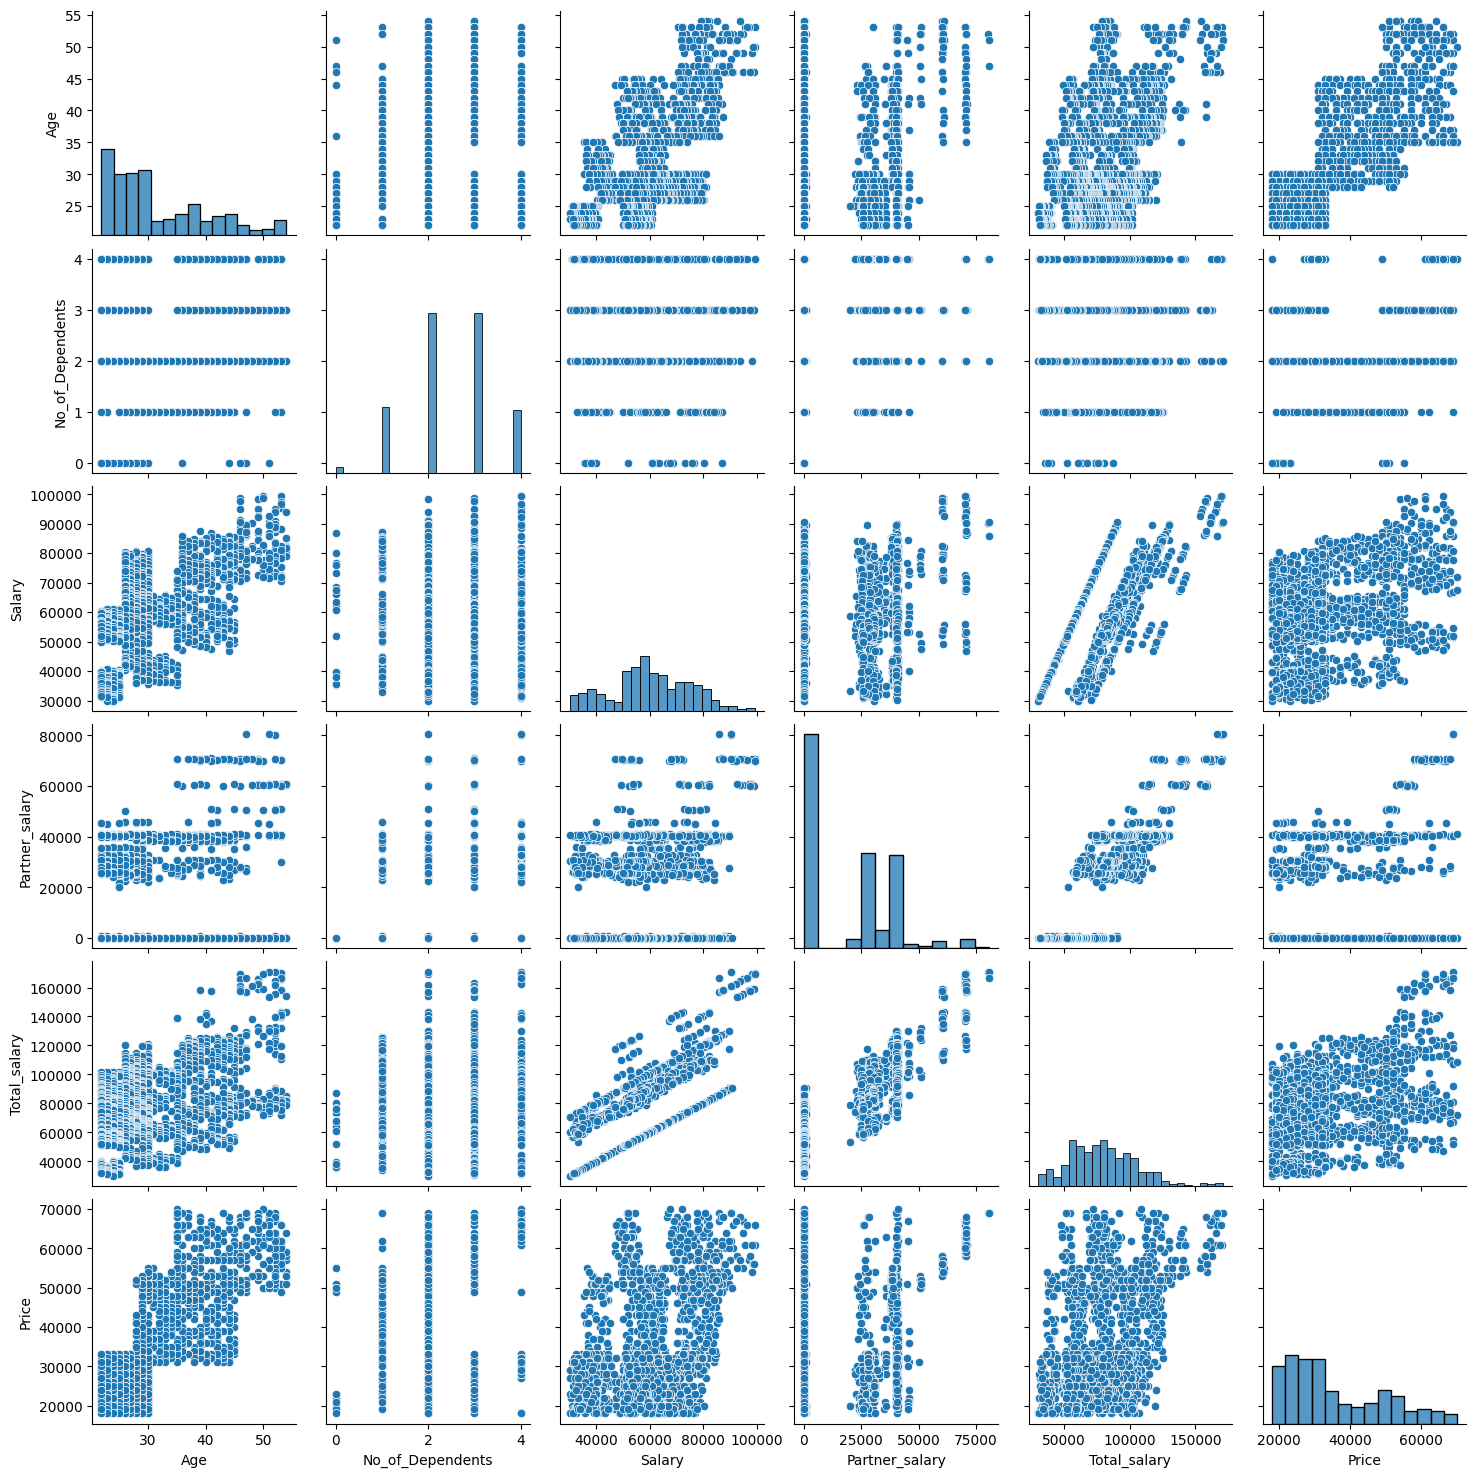

In [98]:
sns.pairplot(df)

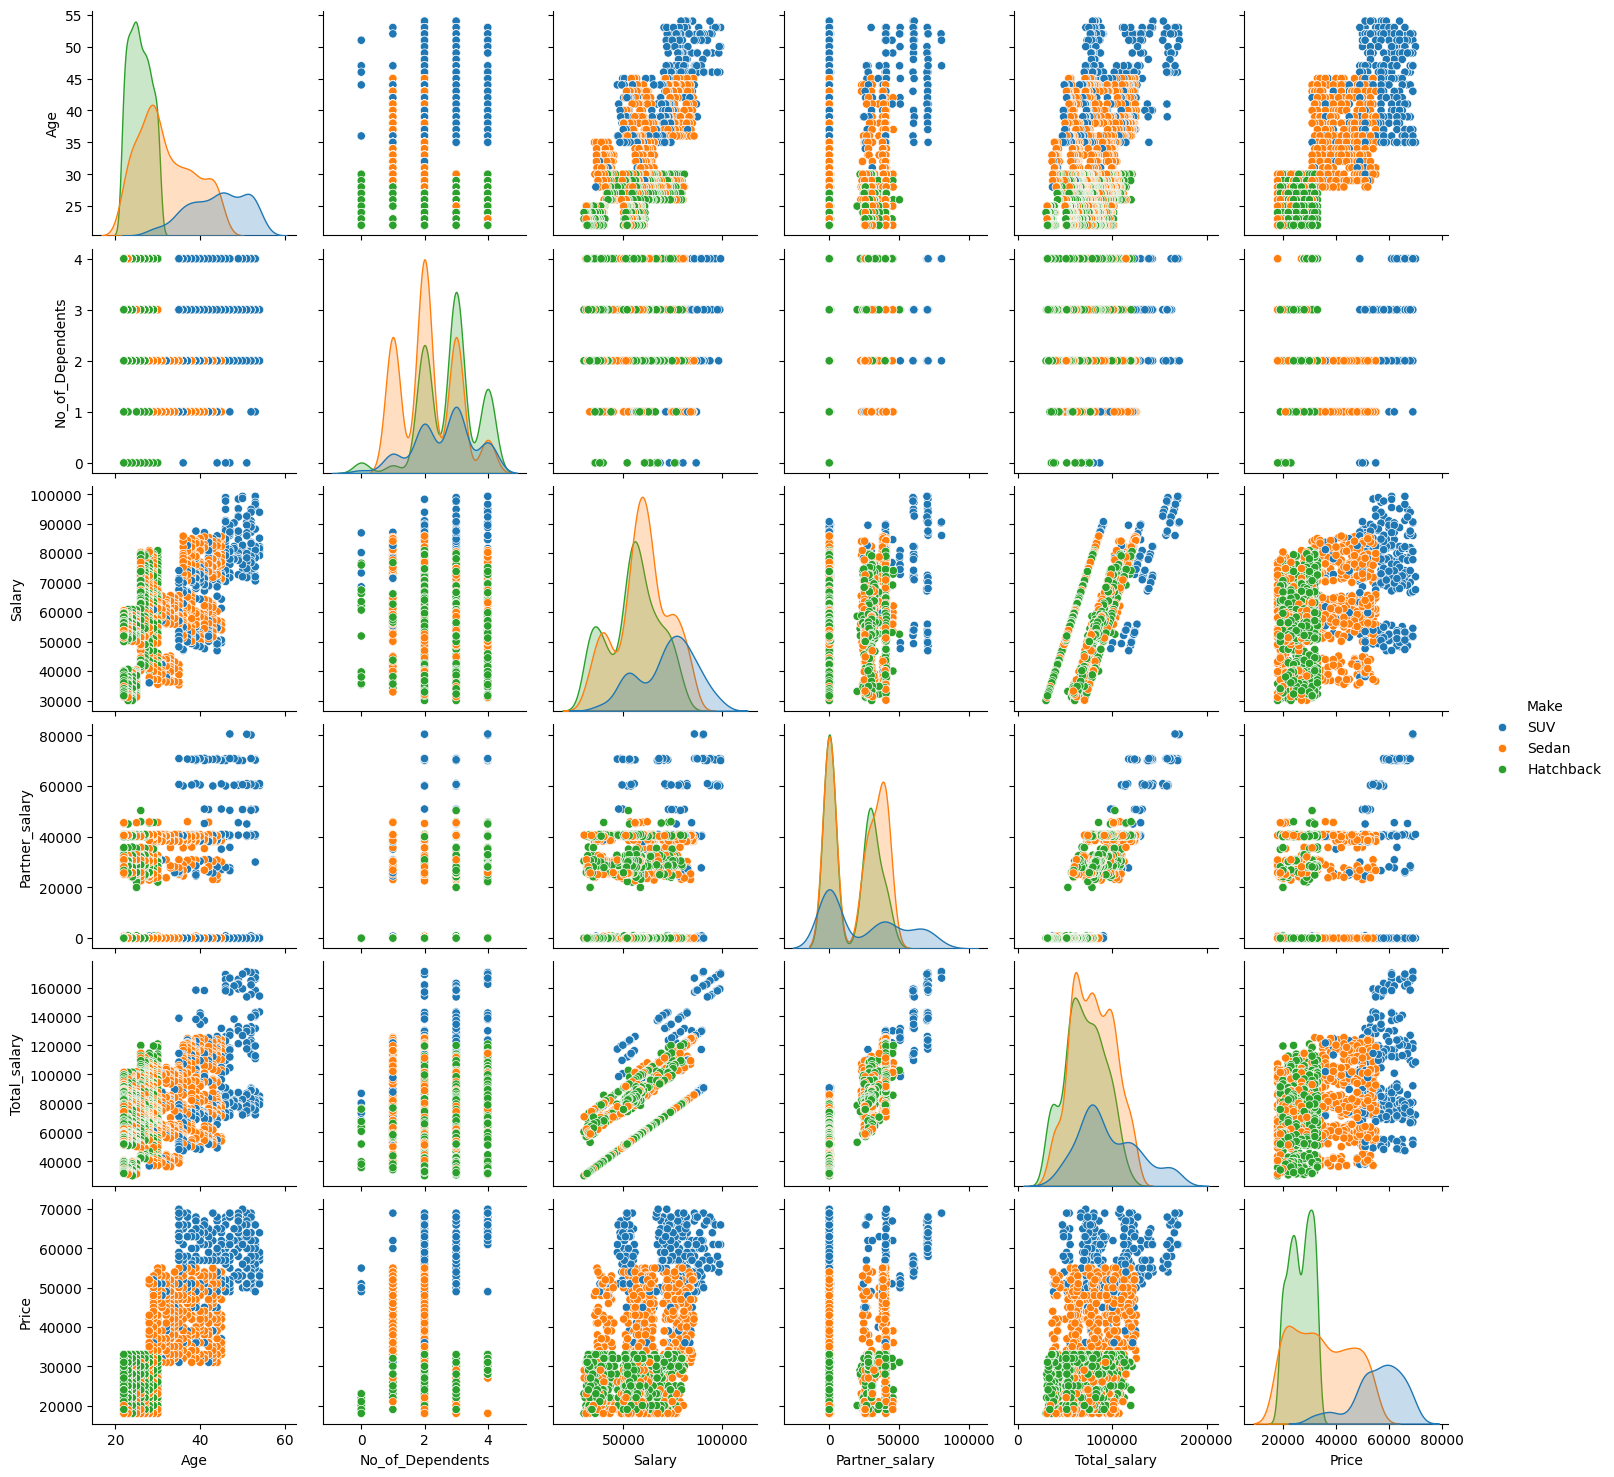

In [99]:
sns.pairplot(df,hue="Make")

In [100]:
Married=df.where((df["Marital_status"]=="Married")).dropna()[["Marital_status","Make"]].groupby("Make").count()

In [101]:
Single=df.where((df["Marital_status"]=="Single")).dropna()[["Marital_status","Make"]].groupby("Make").count()

In [102]:
Married

,Marital_status
Make,
Hatchback,498
SUV,281
Sedan,664


In [103]:
Single

,Marital_status
Make,
Hatchback,84
SUV,16
Sedan,38


In [104]:
MList=[Married.iloc[0][0],Married.iloc[1][0],Married.iloc[2][0]]
SList=[Single.iloc[0][0],Single.iloc[1][0],Single.iloc[2][0]]

In [105]:
MList

[np.int64(498), np.int64(281), np.int64(664)]

In [106]:
SList

[np.int64(84), np.int64(16), np.int64(38)]

In [107]:
Status=pd.DataFrame({"Married":YesList,"Single":noList},index=["Hatchback","SUV","Sedan"])

<Axes: >

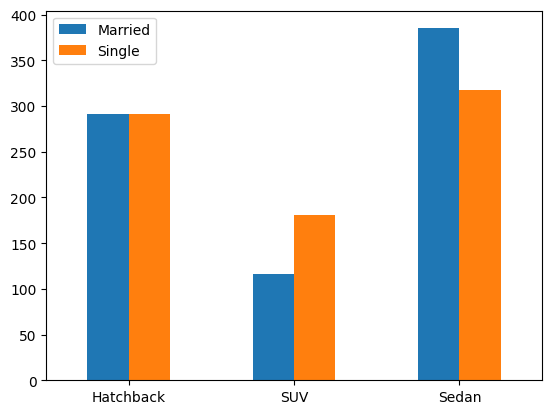

In [108]:
Status.plot.bar(rot=0)

<Axes: xlabel='Salary', ylabel='Count'>

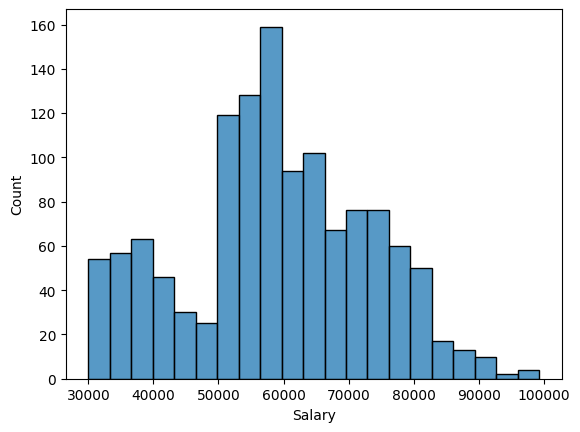

In [109]:
sns.histplot(df.Salary[df.Gender=="Male"])

In [110]:
Partner_working=df.where((df["Partner_working"]=="Yes")).dropna()[["Price","Make"]].groupby("Price").count()

In [111]:
Partner_working

,Make
Price,
18000.0,21
19000.0,28
20000.0,47
21000.0,23
22000.0,31
23000.0,36
24000.0,35
25000.0,20
26000.0,32


In [112]:
df.groupby(['Partner_working', 'Make', 'Gender','Price'])['Price'].count()


Partner_working  Make       Gender  Price
No               Hatchback  Female  20000    1
                                    25000    1
                                    29000    1
                                    30000    1
                                    32000    2
                                            ..
Yes              Sedan      Male    51000    3
                                    52000    5
                                    53000    5
                                    54000    6
                                    55000    3
Name: Price, Length: 257, dtype: int64

# Conclusion

This project demonstrates a structured data analysis workflow, including data cleaning, exploratory analysis, visualization, and statistical evaluation. The analysis highlights the importance of understanding data before making decisions and showcases practical data analyst skills applied to a real-world automobile dataset.